In [1]:
import pandas as pd
import os
import csv 


In [7]:
labels = []
dir = 'captures'
for f in os.listdir(dir):
    key = f.rsplit('.',1)[0].rsplit(" ",1)[1]
    
    if key=="n":
        labels.append({'file_name': f, 'class': 0})
    elif key=="left":
        labels.append({'file_name': f, 'class': 1})
    elif key=="up":
        labels.append({'file_name': f, 'class': 2})
    elif key=="right":
        labels.append({'file_name': f, 'class': 3})
    elif key=="down":
        labels.append({'file_name': f, 'class': 4})
    

field_names= ['file_name', 'class']

with open('labels_snake.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=field_names)
    writer.writeheader()
    writer.writerows(labels)

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

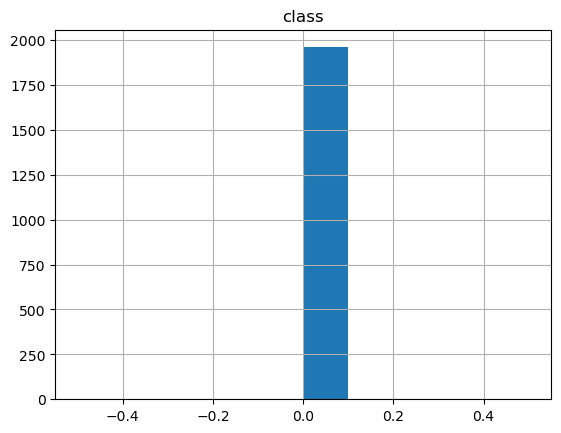

In [5]:
df = pd.read_csv("labels_snake.csv")
df.hist(column = ["class"])

In [6]:
action = df[df['class'] != 0]
non_action = df[df['class']==0]

num = action['class'].value_counts().max()
non_action = non_action.sample(n = num)

df_sample = pd.concat([action, non_action], axis=0).sample(frac = 1)

df_sample.hist(column=['class'])

df_sample.to_csv("labels.csv", index= False)
print(len(df_sample))

ValueError: Only integers accepted as `n` values